In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from termcolor import colored, cprint
import numpy as np
import statistics

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))


pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 100)

In [3]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 99;



<IPython.core.display.Javascript object>

In [4]:
dataPath_2015 = '/home/thomas/Documents/openclassroom/projet3/2015-building-energy-benchmarking.csv'
df_15 = pd.read_csv(dataPath_2015,sep=',',engine='python',on_bad_lines='skip')

In [5]:
dataPath_2016 = '/home/thomas/Documents/openclassroom/projet3/2016-building-energy-benchmarking.csv'
df_16 = pd.read_csv(dataPath_2016,sep=',',engine='python',on_bad_lines='skip')

# 1. Descriptif des relevés pour 2015 et 2016

In [6]:
print(f"shape 2015:{df_15.shape}\n",f"shape 2016: {df_16.shape}")

shape 2015:(3340, 47)
 shape 2016: (3376, 46)


In [7]:
display(df_15.head())

display(df_16.head())

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [8]:
df_15.info()
print("\n")
df_16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

Il y a 47 colonnes dans le fichier de 2015 et 46 déans le fichier de 2016

 les colonnes qui ne sont pas dans le fichier de 2015:

In [9]:
columns15=[i for i  in df_15.columns ]
columns16=[i for i  in df_16.columns ]
cprint("Colonnes 2016 qui ne sont pas dans 2015",'red','on_white')
for col in columns16:
    if col not in columns15:
        print(col)

Colonnes 2016 qui ne sont pas dans 2015
Address
City
State
ZipCode
Latitude
Longitude
Comments
TotalGHGEmissions
GHGEmissionsIntensity


 les colonnes qui ne sont pas dans le fichier de 2016:

In [10]:
columns15=[i for i  in df_15.columns ]
columns16=[i for i  in df_16.columns ]

cprint("Colonnes 2015 qui ne sont pas dans 2016",'red','on_white')
for col in columns15:
    if col not in columns16:
        print(col)

Colonnes 2015 qui ne sont pas dans 2016
Location
OtherFuelUse(kBtu)
GHGEmissions(MetricTonsCO2e)
GHGEmissionsIntensity(kgCO2e/ft2)
Comment
2010 Census Tracts
Seattle Police Department Micro Community Policing Plan Areas
City Council Districts
SPD Beats
Zip Codes


# Les types valeurs dans chaques colonnes:

2015:

In [11]:
for col in df_15.columns:
    cprint(col,'red','on_white')
    display(df_15[col].value_counts())

OSEBuildingID


1        1
25065    1
24746    1
24750    1
24752    1
        ..
20858    1
20861    1
20868    1
20871    1
50059    1
Name: OSEBuildingID, Length: 3340, dtype: int64

DataYear


2015    3340
Name: DataYear, dtype: int64

BuildingType


NonResidential          1461
Multifamily LR (1-4)    1029
Multifamily MR (5-9)     554
Multifamily HR (10+)     107
SPS-District K-12         99
Nonresidential COS        68
Campus                    22
Name: BuildingType, dtype: int64

PrimaryPropertyType


Low-Rise Multifamily           998
Mid-Rise Multifamily           539
Small- and Mid-Sized Office    297
Other                          258
Non-Refrigerated Warehouse     187
Large Office                   171
K-12 School                    136
Mixed Use Property             126
High-Rise Multifamily          103
Retail Store                   100
Hotel                           73
Worship Facility                72
Distribution Center\n           51
Medical Office                  43
Senior Care Community           43
Supermarket/Grocery Store       36
Self-Storage Facility\n         27
College/University              22
Residence Hall/Dormitory        15
Refrigerated Warehouse          13
Restaurant\n                    11
Hospital                        10
SPS-District K-12                4
Distribution Center              2
Laboratory                       1
Self-Storage Facility            1
Restaurant                       1
Name: PrimaryPropertyType, dtype: int64

PropertyName


WAREHOUSE                   9
OFFICE BUILDING             8
CLOVERDALE BUSINESS PARK    5
APARTMENTS                  4
CANAL PL OFFICE PARK        3
                           ..
CORONADO APT                1
THE SHELBY APT              1
KILLARNY APTS               1
L' AMOURITA CO-OP           1
WEDGEWOOD ESTATES BLDG B    1
Name: PropertyName, Length: 3287, dtype: int64

TaxParcelIdentificationNumber


925049346     5
3224049012    5
2400002       5
8632880000    4
3624039009    4
             ..
1684050000    1
1686400005    1
1689400145    1
1697500000    1
660000575     1
Name: TaxParcelIdentificationNumber, Length: 3245, dtype: int64

Location


{'latitude': '47.52593209', 'longitude': '-122.3308402', 'human_address': '{"address": "309 S CLOVERDALE ST", "city": "SEATTLE", "state": "WA", "zip": "98108"}'}              5
{'latitude': '47.66375728', 'longitude': '-122.3002168', 'human_address': '{"address": "2623 NE UNIVERSITY VILLAGE ST", "city": "SEATTLE", "state": "WA", "zip": "98105"}'}    5
{'latitude': '47.52131741', 'longitude': '-122.3668974', 'human_address': '{"address": "2600 SW BARTON ST", "city": "SEATTLE", "state": "WA", "zip": "98126"}'}                4
{'latitude': '47.5829049', 'longitude': '-122.3228994', 'human_address': '{"address": "2203 AIRPORT WAY S", "city": "SEATTLE", "state": "WA", "zip": "98134"}'}                4
{'latitude': '47.5309583', 'longitude': '-122.3320685', 'human_address': '{"address": "121 S KENYON ST", "city": "SEATTLE", "state": "WA", "zip": "98108"}'}                   3
                                                                                                                   

CouncilDistrictCode


7    1037
3     584
2     507
4     344
5     343
1     280
6     245
Name: CouncilDistrictCode, dtype: int64

Neighborhood


DOWNTOWN                 578
EAST                     444
MAGNOLIA / QUEEN ANNE    420
GREATER DUWAMISH         369
NORTHEAST                259
LAKE UNION               249
NORTHWEST                226
NORTH                    188
SOUTHWEST                165
CENTRAL                  131
BALLARD                  130
SOUTHEAST                 96
DELRIDGE                  85
Name: Neighborhood, dtype: int64

YearBuilt


2000    72
2008    69
1989    67
1968    65
1999    65
1988    64
2001    61
2002    60
1990    60
1910    58
1900    56
1970    56
1969    56
1979    55
1928    54
1925    53
2014    51
2013    49
1980    49
1960    49
1985    48
1967    46
2006    45
1926    45
1962    44
1966    43
2007    43
1978    43
1991    42
1963    42
1987    41
1986    41
2009    40
1998    40
1930    40
2005    40
1997    37
1965    37
1961    36
2004    36
1981    35
1929    34
2012    33
1909    33
1984    32
2003    32
1992    31
1907    31
1964    30
1996    29
1958    29
1908    29
1982    29
1994    29
1959    27
1916    27
1971    26
1974    25
1977    25
1927    25
1920    25
2010    24
1983    24
1956    24
1948    23
1973    23
1914    23
1975    23
1954    22
1923    22
1924    22
1993    22
1995    22
1957    21
1955    21
1922    21
1976    21
1953    20
1950    20
1906    20
1949    18
1952    18
1912    18
1972    16
1904    16
1951    16
1947    14
2011    13
1917    13
1902    12
1911    12

NumberofBuildings


1     3321
2        5
7        3
3        3
6        3
11       1
16       1
4        1
39       1
10       1
Name: NumberofBuildings, dtype: int64

NumberofFloors


3.0     701
4.0     700
1.0     451
2.0     444
6.0     299
5.0     289
7.0     133
8.0      60
11.0     32
10.0     31
13.0     20
12.0     18
9.0      18
14.0     12
17.0      9
15.0      8
16.0      7
18.0      7
24.0      7
19.0      6
26.0      6
42.0      6
23.0      6
33.0      6
0.0       5
27.0      5
25.0      5
21.0      5
20.0      4
22.0      4
29.0      3
31.0      2
41.0      2
37.0      2
28.0      2
36.0      2
34.0      2
63.0      1
49.0      1
55.0      1
46.0      1
30.0      1
56.0      1
47.0      1
76.0      1
99.0      1
38.0      1
39.0      1
32.0      1
40.0      1
Name: NumberofFloors, dtype: int64

PropertyGFATotal


21600     9
36000     8
25920     8
28800     7
24000     6
         ..
37944     1
28546     1
219874    1
73736     1
53100     1
Name: PropertyGFATotal, Length: 3150, dtype: int64

PropertyGFAParking


0        2416
13320       3
25920       3
30000       2
11544       2
         ... 
34414       1
11286       1
93260       1
17057       1
41915       1
Name: PropertyGFAParking, Length: 908, dtype: int64

PropertyGFABuilding(s)


21600     9
25920     8
28800     7
36000     7
24000     6
         ..
190610    1
50028     1
42093     1
299755    1
53100     1
Name: PropertyGFABuilding(s), Length: 3145, dtype: int64

ListOfAllPropertyUseTypes


Multifamily Housing                                                                                                                    862
Multifamily Housing, Parking                                                                                                           406
K-12 School                                                                                                                            133
Office                                                                                                                                 132
Office, Parking                                                                                                                        112
                                                                                                                                      ... 
Manufacturing/Industrial Plant, Office, Parking                                                                                          1
Automobile Dealership, Offi

LargestPropertyUseType


Multifamily Housing                                     1598
Office                                                   479
Non-Refrigerated Warehouse                               194
K-12 School                                              136
Other                                                    104
Retail Store                                              99
Worship Facility                                          70
Hotel                                                     68
Distribution Center                                       52
Medical Office                                            43
Senior Care Community                                     42
Supermarket/Grocery Store                                 37
Parking                                                   28
Self-Storage Facility                                     27
College/University                                        21
Other - Recreation                                        20
Other - Entertainment/Pu

LargestPropertyUseTypeGFA


22000.0     9
24000.0     9
30000.0     8
20000.0     8
21600.0     8
           ..
62422.0     1
293000.0    1
37859.0     1
31956.0     1
25265.0     1
Name: LargestPropertyUseTypeGFA, Length: 2979, dtype: int64

SecondLargestPropertyUseType


Parking                                            881
Office                                             204
Retail Store                                       155
Other                                               57
Restaurant                                          43
Non-Refrigerated Warehouse                          35
Multifamily Housing                                 16
Supermarket/Grocery Store                           14
Data Center                                         13
Medical Office                                      12
Other - Services                                    12
Fitness Center/Health Club/Gym                      10
Other - Entertainment/Public Assembly                9
Swimming Pool                                        8
Distribution Center                                  7
Laboratory                                           6
Bank Branch                                          6
K-12 School                                          6
Other - Re

SecondLargestPropertyUseTypeGFA


0.0        111
5000.0      13
7200.0      13
6000.0      12
15000.0     10
          ... 
15661.0      1
15724.0      1
14081.0      1
22372.0      1
11745.0      1
Name: SecondLargestPropertyUseTypeGFA, Length: 1270, dtype: int64

ThirdLargestPropertyUseType


Retail Store                                            107
Office                                                  100
Parking                                                  64
Restaurant                                               54
Other                                                    53
Swimming Pool                                            25
Non-Refrigerated Warehouse                               18
Medical Office                                           17
Social/Meeting Hall                                      11
Food Service                                             11
Data Center                                              10
Multifamily Housing                                      10
Other - Restaurant/Bar                                    8
Bank Branch                                               6
Financial Office                                          5
Other - Entertainment/Public Assembly                     5
Personal Services (Health/Beauty, Dry Cl

ThirdLargestPropertyUseTypeGFA


0.0        44
6000.0      7
5000.0      6
3000.0      5
1000.0      4
           ..
35760.0     1
5636.0      1
15757.0     1
4270.0      1
24879.0     1
Name: ThirdLargestPropertyUseTypeGFA, Length: 474, dtype: int64

YearsENERGYSTARCertified


2016                                                                                        20
2016, 2015                                                                                   8
2014                                                                                         6
2009                                                                                         4
2016, 2015, 2014                                                                             3
2015                                                                                         3
2013                                                                                         3
2015, 2014                                                                                   3
2010                                                                                         2
2011                                                                                         2
2011, 2009                                        

ENERGYSTARScore


100.0    106
95.0      79
94.0      70
97.0      60
99.0      59
93.0      56
81.0      56
89.0      54
98.0      54
86.0      52
85.0      52
91.0      51
92.0      50
88.0      49
83.0      48
84.0      46
90.0      44
77.0      44
79.0      43
1.0       42
82.0      41
87.0      41
65.0      40
96.0      40
80.0      37
69.0      36
74.0      36
72.0      35
71.0      32
73.0      32
61.0      32
68.0      31
57.0      29
60.0      28
52.0      28
78.0      28
67.0      26
75.0      26
76.0      26
59.0      25
70.0      25
64.0      24
48.0      23
54.0      23
62.0      22
51.0      22
55.0      21
30.0      20
42.0      19
56.0      19
66.0      18
49.0      18
28.0      18
58.0      18
50.0      17
27.0      17
19.0      16
43.0      16
45.0      16
34.0      16
39.0      15
44.0      15
35.0      14
53.0      14
63.0      14
22.0      13
41.0      13
18.0      13
31.0      13
46.0      13
33.0      13
8.0       13
23.0      12
11.0      12
14.0      12
13.0      11
4.0       11

SiteEUI(kBtu/sf)


27.2     18
28.5     16
29.3     16
29.6     16
29.8     15
         ..
79.3      1
106.6     1
84.6      1
88.4      1
210.0     1
Name: SiteEUI(kBtu/sf), Length: 1072, dtype: int64

SiteEUIWN(kBtu/sf)


29.6     15
29.7     15
25.0     14
30.5     14
26.5     14
         ..
96.3      1
104.0     1
132.1     1
1.8       1
9.7       1
Name: SiteEUIWN(kBtu/sf), Length: 1115, dtype: int64

SourceEUI(kBtu/sf)


78.4      9
65.7      9
78.6      9
81.3      9
68.4      9
         ..
178.2     1
153.6     1
1109.1    1
31.3      1
84.0      1
Name: SourceEUI(kBtu/sf), Length: 1673, dtype: int64

SourceEUIWN(kBtu/sf)


0.0      12
99.0      9
80.0      8
85.9      8
101.8     8
         ..
339.0     1
200.0     1
210.7     1
157.7     1
119.5     1
Name: SourceEUIWN(kBtu/sf), Length: 1687, dtype: int64

SiteEnergyUse(kBtu)


784584.0      2
0.0           2
767213.0      2
2074152.0     2
764906.0      1
             ..
1392015.0     1
3568616.0     1
722951.0      1
18628834.0    1
966376.0      1
Name: SiteEnergyUse(kBtu), Length: 3326, dtype: int64

SiteEnergyUseWN(kBtu)


0.0           12
7097539.0      1
463458.0       1
722090.0       1
12438379.0     1
              ..
1057102.0      1
11332392.0     1
581734.0       1
1876070.0      1
1053118.0      1
Name: SiteEnergyUseWN(kBtu), Length: 3319, dtype: int64

SteamUse(kBtu)


0.0            3200
216792.0          1
4898180.0         1
798277.0          1
1340007.0         1
184557.0          1
1760138.0         1
5441320.0         1
3079588.0         1
1058012.0         1
1050707.0         1
3085788.0         1
448146.0          1
1349585.0         1
533834.0          1
907147.0          1
1698709.0         1
456687.0          1
127869744.0       1
4128470.0         1
1648136.0         1
1663608.0         1
6352835.0         1
2726250.0         1
3054035.0         1
305664.0          1
1975527.0         1
3274333.0         1
21474092.0        1
1582184.0         1
1099052.0         1
6765824.0         1
642693.0          1
2023032.0         1
3984262.0         1
1326000.0         1
13254980.0        1
17759434.0        1
29729128.0        1
2359521.0         1
138504.0          1
18014064.0        1
5152989.0         1
310440.0          1
723335.0          1
505677.0          1
296619.0          1
854542.0          1
3274475.0         1
881986.0          1


Electricity(kWh)


340715.0     2
221628.0     2
0.0          2
1080307.0    1
177006.0     1
            ..
225289.0     1
884477.0     1
128939.0     1
2877230.0    1
283229.0     1
Name: Electricity(kWh), Length: 3327, dtype: int64

Electricity(kBtu)


0.0          2
3686160.0    1
603970.0     1
108258.0     1
3530072.0    1
            ..
768718.0     1
3017962.0    1
439956.0     1
9817516.0    1
966416.0     1
Name: Electricity(kBtu), Length: 3329, dtype: int64

NaturalGas(therms)


0.0         1256
4789.0         3
10.0           3
2.0            3
7584.0         3
            ... 
13760.0        1
15994.0        1
13048.0        1
4273.0         1
110669.0       1
Name: NaturalGas(therms), Length: 1995, dtype: int64

NaturalGas(kBtu)


0.0           1256
92348.0          2
220582.0         2
1272388.0        1
856861.0         1
              ... 
187829.0         1
23516.0          1
165019.0         1
527400.0         1
11066893.0       1
Name: NaturalGas(kBtu), Length: 2073, dtype: int64

OtherFuelUse(kBtu)


0.0          3313
6464408.0       1
178094.0        1
143134.0        1
5596.0          1
229942.0        1
145944.0        1
427938.0        1
1943011.0       1
12551.0         1
547.0           1
15527.0         1
2304567.0       1
2944419.0       1
337952.0        1
8269669.0       1
177849.0        1
182715.0        1
Name: OtherFuelUse(kBtu), dtype: int64

GHGEmissions(MetricTonsCO2e)


4.65      8
4.55      6
3.54      6
3.47      6
6.71      5
         ..
66.79     1
8.86      1
43.70     1
0.76      1
627.97    1
Name: GHGEmissions(MetricTonsCO2e), Length: 2763, dtype: int64

GHGEmissionsIntensity(kgCO2e/ft2)


0.06     258
0.07     206
0.05     154
0.08     146
0.09      81
        ... 
3.32       1
4.49       1
4.40       1
6.32       1
10.04      1
Name: GHGEmissionsIntensity(kgCO2e/ft2), Length: 471, dtype: int64

DefaultData


No     2791
Yes     548
Name: DefaultData, dtype: int64

Comment


Under construction starting 6/2013 (old building demolished) and ending 9/2016. New Building re-opened 9/2016. Year built changed from 1948 to 2016.                                                                                                               1
Part of McKinstry's campus, property operates a fabrication and production shop and is conditioned by natural gas overhead radiant unit heaters with no cooling. Learn more at www.mckinstry.com.                                                                  1
One of two office buildings on McKinstry's campus partially remodeled in 2009 from warehouse to office space. Served by rooftop air handling units with underfloor VAVs.  Self-performed energy efficiency upgrades in 2015 include a long-term LED lighting re    1
Part of McKinstry’s campus, this remodeled warehouse is mainly office but includes a full-size basketball court and gym with locker rooms, bistro with a full kitchen, and data center. Served by rooftop package units f

ComplianceStatus


Compliant        3337
Not Compliant       3
Name: ComplianceStatus, dtype: int64

Outlier


High Outlier    46
Low Outlier     38
Name: Outlier, dtype: int64

2010 Census Tracts


123.0    48
117.0    34
122.0    26
116.0    23
119.0    23
134.0    19
127.0    14
131.0    11
135.0    10
124.0     9
125.0     4
129.0     2
118.0     1
Name: 2010 Census Tracts, dtype: int64

Seattle Police Department Micro Community Policing Plan Areas


50.0    342
8.0     239
56.0    218
14.0    209
46.0    172
19.0    142
60.0    141
57.0    132
5.0     131
22.0    107
4.0      99
29.0     83
53.0     80
33.0     80
49.0     78
27.0     71
55.0     65
20.0     64
6.0      63
9.0      60
1.0      60
61.0     45
23.0     42
17.0     38
2.0      33
41.0     30
54.0     29
59.0     29
42.0     28
28.0     28
3.0      28
37.0     27
35.0     27
32.0     23
7.0      21
38.0     21
45.0     20
24.0     18
31.0     17
44.0     17
51.0     16
36.0     16
58.0     15
25.0     14
10.0     12
47.0     12
16.0     12
34.0     11
11.0     10
40.0     10
26.0      7
43.0      7
15.0      6
12.0      6
21.0      5
48.0      5
52.0      5
13.0      4
18.0      4
30.0      3
39.0      1
Name: Seattle Police Department Micro Community Policing Plan Areas, dtype: int64

City Council Districts


1.0    139
2.0     74
Name: City Council Districts, dtype: int64

SPD Beats


40.0    198
5.0     127
10.0    124
9.0     124
12.0    117
36.0    115
39.0    114
7.0     113
38.0    102
27.0     84
22.0     84
48.0     82
19.0     81
4.0      79
1.0      78
28.0     77
49.0     75
50.0     74
26.0     73
35.0     73
20.0     73
11.0     71
2.0      71
47.0     68
3.0      64
30.0     64
37.0     58
24.0     57
31.0     51
6.0      51
33.0     50
32.0     50
16.0     50
34.0     46
17.0     40
21.0     39
29.0     38
15.0     36
25.0     36
42.0     35
51.0     35
13.0     35
18.0     32
41.0     29
8.0      29
45.0     27
44.0     26
14.0     24
43.0     24
23.0     20
46.0     15
Name: SPD Beats, dtype: int64

Zip Codes


18390    309
18379    259
19578    238
18081    234
18383    189
19584    182
19576    180
19575    164
18376    163
18377    158
19579    155
18388    135
19582    124
18792    124
18386    106
18795     94
17919     93
18800     90
18789     72
18235     70
19581     62
18385     62
18798     31
17916     29
18229      7
17920      4
18230      3
17926      2
17923      1
Name: Zip Codes, dtype: int64

on remarque que dans la colonne 'Location' du fichier 2015 est composé des colonnes 'Address', 'City' ,'State'
'ZipCode', 'state', 'latitude' et 'longitude' de 2016.
on va transformer la colonne location de 2015 pour quelle corresponde à la nomenclature de 2016.

In [12]:
def newColumnsLocation(df):
    newColumns ={'Latitude':[],
                'Longitude':[],
                 'Address':[],
                 'City':[],
                 'State':[],
                 'ZipCode':[]
                }
    for index in df.index:
        rowDic = eval(str(df.iloc[index]))
        rowDic['human_address'] = eval(rowDic['human_address'])
        newColumns['Latitude'].append(rowDic['latitude'])
        newColumns['Longitude'].append(rowDic['longitude'])
        newColumns['Address'].append(str(rowDic['human_address']['address']))
        newColumns['City'].append(rowDic['human_address']['city'])
        newColumns['State'].append(rowDic['human_address']['state'])
        newColumns['ZipCode'].append(rowDic['human_address']['zip'])
    return newColumns
        
newColumns = newColumnsLocation(df_15.loc[:,'Location'])
dfNewCol = pd.DataFrame(newColumns)
df_15= pd.concat([df_15,dfNewCol],axis=1,ignore_index=False)
for i in ['Latitude','Longitude','Address','City','State','ZipCode']:
    df_15= df_15.astype({i: df_16[i].dtype})
df_15=df_15.drop('Location',axis=1)

On a bien 52 colonnes à la fin de l'operation (47+6-1)

### les colonnes qui sont absentes de 2016
on va supprimer les colonnes qui ne sont pas pertinentes dans le fichier de 2015 et qui ne sont pas dans le fichier 2016:
OtherFuelUse(kBtu), 2010 Census Tracts , Seattle Police Department Micro Community Policing Plan Areas ,City Council Districts ,SPD Beats et Zip Codes

In [13]:
df_15=df_15.drop(['OtherFuelUse(kBtu)','2010 Census Tracts',
            'Seattle Police Department Micro Community Policing Plan Areas',
            'City Council Districts','SPD Beats','Zip Codes'],axis=1)

on renomme la colonne de 2015 'Comment' en'Comments' pour la faire correspondre à la nomenclature de 2016

In [14]:
df_15=df_15.rename(columns={'Comment': 'Comments'})

Il ne reste que ces colonnes qui diffèrent entre les 2 fichiers:

In [15]:
columns15=[i for i  in df_15.columns ]
columns16=[i for i  in df_16.columns ]

cprint("Colonnes 2016 qui ne sont pas dans 2015",'red','on_white')
for col in columns16:
    if col not in columns15:
        print(col)
cprint("Colonnes 2015 qui ne sont pas dans 2016",'red','on_white')
for col in columns15:
    if col not in columns16:
        print(col)

Colonnes 2016 qui ne sont pas dans 2015
TotalGHGEmissions
GHGEmissionsIntensity
Colonnes 2015 qui ne sont pas dans 2016
GHGEmissions(MetricTonsCO2e)
GHGEmissionsIntensity(kgCO2e/ft2)


D'après les documents Json fournient avec les données.
TotalGHGEmissions correspond à GHGEmissions(MetricTonsCO2e)
et GHGEmissionsIntensity correspond à GHGEmissionsIntensity(kgCO2e/ft2)

In [16]:
print(f"{df_16['TotalGHGEmissions'].describe()}",
        f"{df_15['GHGEmissions(MetricTonsCO2e)'].describe()}",
        f"{df_16['GHGEmissionsIntensity'].describe()}",
        f"{df_15['GHGEmissionsIntensity(kgCO2e/ft2)'].describe()}",sep="\n----------\n")

count     3367.000000
mean       119.723971
std        538.832227
min         -0.800000
25%          9.495000
50%         33.920000
75%         93.940000
max      16870.980000
Name: TotalGHGEmissions, dtype: float64
----------
count     3330.000000
mean       110.094102
std        409.450179
min          0.000000
25%          9.265000
50%         32.740000
75%         88.642500
max      11824.890000
Name: GHGEmissions(MetricTonsCO2e), dtype: float64
----------
count    3367.000000
mean        1.175916
std         1.821452
min        -0.020000
25%         0.210000
50%         0.610000
75%         1.370000
max        34.090000
Name: GHGEmissionsIntensity, dtype: float64
----------
count    3330.000000
mean        0.985339
std         1.637172
min         0.000000
25%         0.080000
50%         0.460000
75%         1.180000
max        31.380000
Name: GHGEmissionsIntensity(kgCO2e/ft2), dtype: float64


on renomme les colonnes suivantes pour le fichier de 2015:
- GHGEmissions(MetricTonsCO2e) -> TotalGHGEmissions
- GHGEmissionsIntensity(kgCO2e/ft2) -> GHGEmissionsIntensity


In [17]:
df_15=df_15.rename(columns={'GHGEmissions(MetricTonsCO2e)': 'TotalGHGEmissions',
                            'GHGEmissionsIntensity(kgCO2e/ft2)': 'GHGEmissionsIntensity'})

taille des données de 2015 et 2016:

In [18]:
df_15.shape

(3340, 46)

In [19]:
df_16.shape

(3376, 46)

### 1.2 Vérification de types de données

on affiche les colonnes des fichiers 2015 et 2016  qui ont des types de données différents

In [20]:
dataType=pd.concat([df_15.dtypes,df_16.dtypes],axis=1)
sameType=(dataType.loc[:,0] == dataType.loc[:,1])
dataType= pd.concat([df_15.dtypes,df_16.dtypes,sameType],axis=1)
dataType = dataType.rename(columns={0:'2015',1:'2016',2:'same_type'})
display(dataType[dataType['same_type']==False])

,2015,2016,same_type
NumberofBuildings,int64,float64,False
NumberofFloors,float64,int64,False
DefaultData,object,bool,False
Comments,object,float64,False


In [21]:
print(f"colonnes qui ne sont ni dans 2015, ni dans 2016: \n{set(df_15.columns)-set(df_16.columns)}")

colonnes qui ne sont ni dans 2015, ni dans 2016: 
set()


on regarde si nombre de batiments et nombre d'étages possèdent des valeurs décimales:

In [22]:
numOfB = df_16.loc[:,'NumberofBuildings'].dropna()
for i in numOfB.index:
    unit, decimal = str(df_16.loc[i,'NumberofBuildings']).split('.')
    if (int(decimal) != 0):
        print(f"number of buildings :{df_16.loc[i,'NumberofBuildings']}")
        
numOfF = df_15.loc[:,'NumberofFloors'].dropna()
for i in numOfF.index:
    unit, decimal = str(df_15.loc[i,'NumberofFloors']).split('.')
    if (int(decimal) != 0):
        print(f"number of floors: {df_15.loc[i,'NumberofFloors']}")

In [23]:
df_16.NumberofBuildings = df_16.NumberofBuildings.astype(int, errors='ignore')
df_15.NumberofFloors = df_15.NumberofFloors.astype(int, errors='ignore')

### on supprime les outliers des fichier 2015 & 2016 grace à la colonnes 'Outlier'

In [24]:
df_15 = df_15.drop(df_15[ df_15['Outlier'].notna() ].index, axis=0)
df_16 = df_16.drop(df_16[ df_16['Outlier'].notna() ].index, axis=0)

### on regroupe les données dans un seul jeu:

In [25]:
df = pd.concat([df_15,df_16], axis=0).sort_values(['OSEBuildingID','DataYear'])
df = df.reset_index(drop=True) # on reset l'index pour éviter les lignes en double

In [26]:
display(df)


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,Comments,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.900000,80.300000,173.500000,175.100000,6.981428e+06,7.097539e+06,2023032.0,1.080307e+06,3.686160e+06,12724.000000,1.272388e+06,249.43,2.64,No,NaN,Compliant,NaN,47.612190,-122.337997,405 OLIVE WAY,SEATTLE,WA,98101.0
1,1,2016,NonResidential,Hotel,Mayflower park hotel,0659000030,7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.0,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,249.98,2.83,False,NaN,Compliant,NaN,47.612200,-122.337990,405 Olive way,Seattle,WA,98101.0
2,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.400000,99.000000,191.300000,195.200000,8.354235e+06,8.765788e+06,0.0,1.144563e+06,3.905411e+06,44490.000000,4.448985e+06,263.51,2.38,No,NaN,Compliant,NaN,47.613106,-122.333358,724 PINE ST,SEATTLE,WA,98101.0
3,2,2016,NonResidential,Hotel,Paramount Hotel,0659000220,7,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.0,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,295.86,2.86,False,NaN,Compliant,NaN,47.613170,-122.333930,724 Pine street,Seattle,WA,98101.0
4,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1.0,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.600000,99.700000,242.700000,246.500000,7.313066e+07,7.550627e+07,19660404.0,1.458393e+07,4.976244e+07,37099.000000,3.709900e+06,2061.48,1.92,Yes,NaN,Compliant,NaN,47.613349,-122.337699,1900 5TH AVE,SEATTLE,WA,98101.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6595,50222,2016,Nonresidential COS,Office,Horticulture building,1624049080,2,GREATER DUWAMISH,1990,1.0,1.0,12294,0,12294,Office,Office,12294.0,NaN,NaN,NaN,NaN,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.0,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,20.94,1.70,True,NaN,Error - Correct Default Data,NaN,47.567220,-122.311540,1600 S Dakota St,Seattle,WA,NaN
6596,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,3558300000,2,DOWNTOWN,2004,1.0,1.0,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.0,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,32.17,2.01,False,NaN,Compliant,NaN,47.596250,-122.322830,719 8th Ave S,Seattle,WA,NaN
6597,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1794501150,7,MAGNOLIA / QUEEN ANNE,1974,1.0,1.0,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swimming Pool,0.0,NaN,NaN,438.20

In [27]:
display(df.dtypes)

OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
TaxParcelIdentificationNumber       object
CouncilDistrictCode                  int64
Neighborhood                        object
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                     float64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLargestPropertyUseType        object
SecondLargestPropertyUseTypeGFA    float64
ThirdLargestPropertyUseType         object
ThirdLargestPropertyUseTypeGFA     float64
YearsENERGYSTARCertified            object
ENERGYSTARScore                    float64
SiteEUI(kBt

### Les  types de batiments

In [28]:
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

## on supprime les habitations

In [29]:
df = df[ -df['BuildingType'].str.contains("Multifamily")]
print(f"nouvelle dimension: {df.shape}", f"\n type de batiments: {df['BuildingType'].unique()}")

nouvelle dimension: (3270, 46) 
 type de batiments: ['NonResidential' 'Nonresidential COS' 'SPS-District K-12' 'Campus'
 'Nonresidential WA']


In [30]:
data=[]
buildType=[]
for item in df['BuildingType'].value_counts().items():
    data.append(item[1])
    buildType.append(item[0])

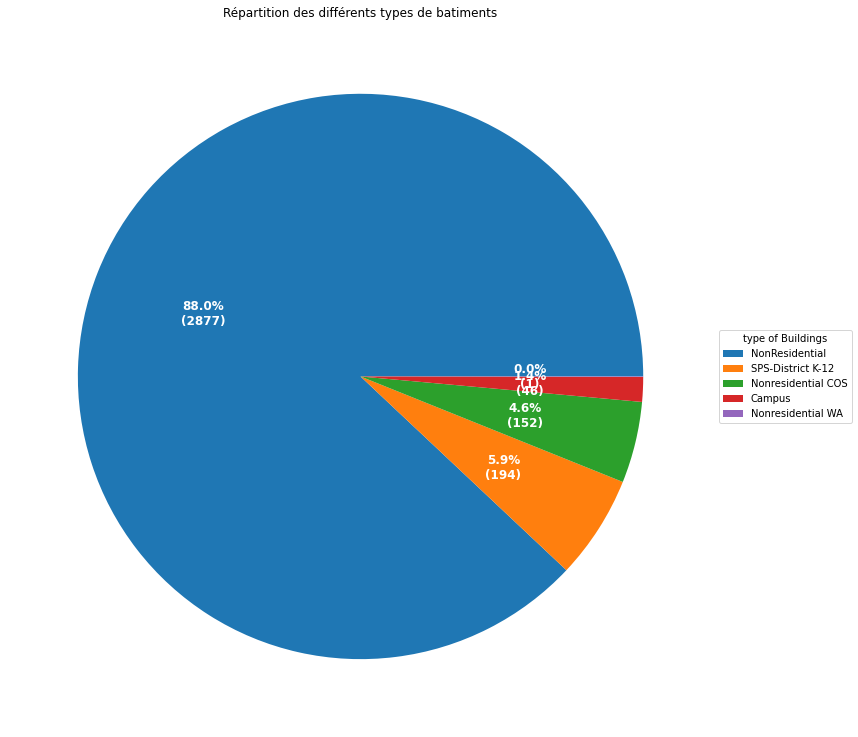

In [31]:
fig, ax = plt.subplots(figsize=(16, 13), subplot_kw=dict(aspect="equal"))



def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, buildType,
          title="type of Buildings",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")

ax.set_title("Répartition des différents types de batiments")

plt.show()


# Les NaN dans chaques catégories

Text(0.5, 1.0, 'proportion de NaN dans chaques colonnes en pourcentage')

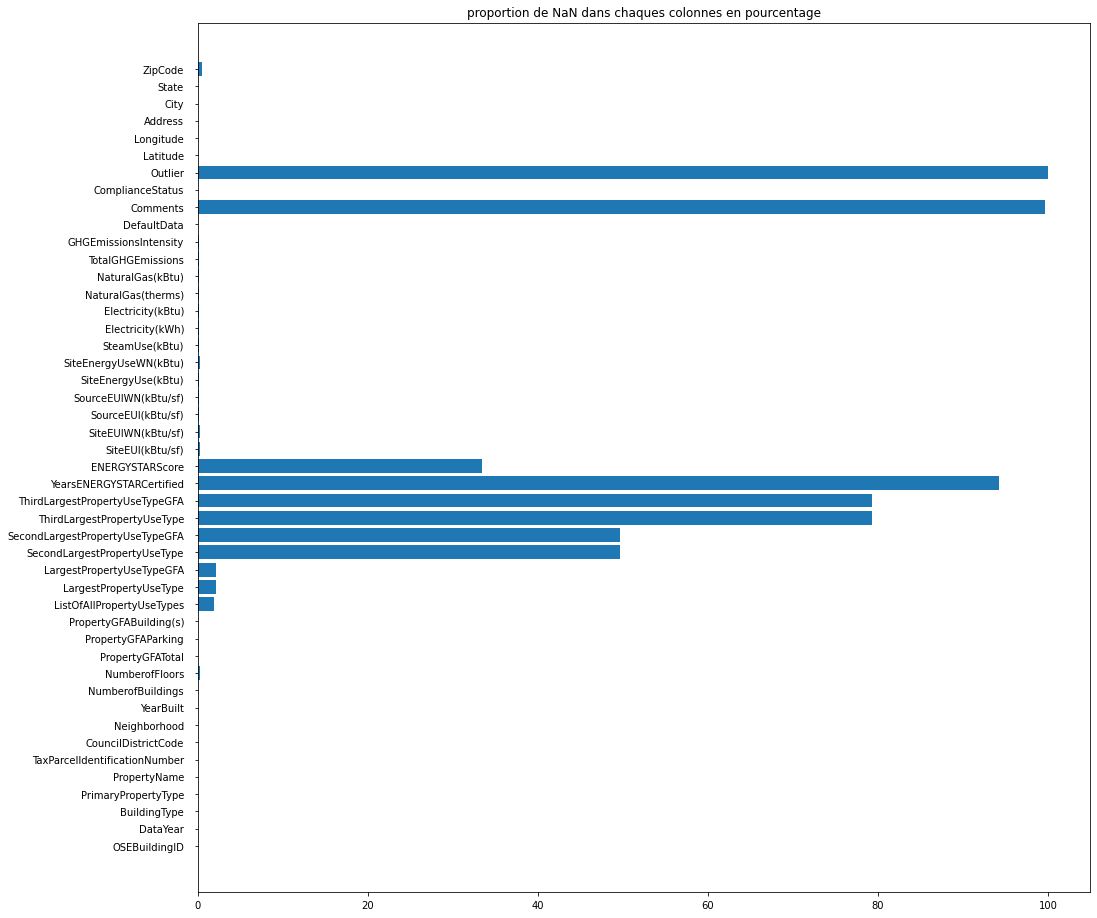

In [32]:
name=[]
ratio=[]
for col in df.columns:
    r=(len(df.loc[:,col]) - len(df.loc[:,col].dropna()))/len(df.loc[:,col])*100
    ratio.append(r)
    name.append(col)
    
fig, ax = plt.subplots(figsize =(16, 16))
 
# Horizontal Bar Plot
ax.barh(name, ratio)
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)


 

ax.set_title('proportion de NaN dans chaques colonnes en pourcentage',
             loc ='center', )

## Choix des Colonnes

In [33]:
colUsed=['OSEBuildingID','DataYear','BuildingType','PrimaryPropertyType','CouncilDistrictCode',
                   'YearBuilt','NumberofBuildings','NumberofFloors','PropertyGFATotal','PropertyGFAParking',
                   'PropertyGFABuilding(s)','SiteEUI(kBtu/sf)','SiteEUIWN(kBtu/sf)','SourceEUI(kBtu/sf)',
                   'SourceEUIWN(kBtu/sf)','SiteEnergyUse(kBtu)','SiteEnergyUseWN(kBtu)','Electricity(kBtu)',
                   'NaturalGas(kBtu)','TotalGHGEmissions','GHGEmissionsIntensity','Latitude','Longitude','Address',
                   'ENERGYSTARScore','LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType']
dfUsed = df.loc[:,colUsed]
#dfUsed.isnull().any()

In [34]:
for i in dfUsed.columns:
    if df[i].dtypes=='int64' or df[i].dtypes=='float64':
        print(f"colonne : {i} , minimum: {dfUsed[i].min()}, maximum : {dfUsed[i].max()}\n")

colonne : OSEBuildingID , minimum: 1, maximum : 50226

colonne : DataYear , minimum: 2015, maximum : 2016

colonne : CouncilDistrictCode , minimum: 1, maximum : 7

colonne : YearBuilt , minimum: 1900, maximum : 2015

colonne : NumberofBuildings , minimum: 0.0, maximum : 111.0

colonne : NumberofFloors , minimum: 0.0, maximum : 99.0

colonne : PropertyGFATotal , minimum: 11285, maximum : 9320156

colonne : PropertyGFAParking , minimum: -2, maximum : 512608

colonne : PropertyGFABuilding(s) , minimum: -50550, maximum : 9320156

colonne : SiteEUI(kBtu/sf) , minimum: 0.0, maximum : 834.4000244

colonne : SiteEUIWN(kBtu/sf) , minimum: 0.0, maximum : 834.4000244

colonne : SourceEUI(kBtu/sf) , minimum: 0.0, maximum : 2620.0

colonne : SourceEUIWN(kBtu/sf) , minimum: -2.099999905, maximum : 2620.0

colonne : SiteEnergyUse(kBtu) , minimum: 0.0, maximum : 873923712.0

colonne : SiteEnergyUseWN(kBtu) , minimum: 0.0, maximum : 471613856.0

colonne : Electricity(kBtu) , minimum: -115417.0, maximum

## Outliers

In [35]:
colToClean=['NumberofBuildings','NumberofFloors','PropertyGFATotal','PropertyGFAParking','PropertyGFABuilding(s)',
              'SiteEUI(kBtu/sf)','SiteEUIWN(kBtu/sf)','SourceEUI(kBtu/sf)','SourceEUIWN(kBtu/sf)',
              'SiteEnergyUse(kBtu)','SiteEnergyUseWN(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)',
              'TotalGHGEmissions','GHGEmissionsIntensity']

In [36]:
def CleanOutlier(df,colonnes):
    ind=[]

    nbOutlier=round(dfUsed.shape[0]/200)+1
    
    for i in colonnes:
        dfCol=df[i].dropna().sort_values()
        head = dfCol.head(int(nbOutlier/2)).index.array
        head= list(head)
        tail = dfCol.tail(int(nbOutlier/2)).index.array
        tail = list(tail)
        ind= ind + head + tail
    
    ind=list(set(ind))
    initialNumb = df.shape[0]
    print(f"initial number of rows: {initialNumb}")
    print(f"number of rows to drop: {len(ind)} \n ratio of droped ouliers :{round(len(ind)/initialNumb*100,2)} %")
    df = df.drop(index=ind)
    print(f"number of rows : {df.shape[0]}")
    return df
    
    

In [37]:
dfUsed = CleanOutlier(dfUsed,colToClean)

#for i in dfUsed.columns:
#    print(f"colonne : {i} , minimum: {dfUsed[i].min()}, maximum : {dfUsed[i].max()}\n")

initial number of rows: 3270
number of rows to drop: 127 
 ratio of droped ouliers :3.88 %
number of rows : 3143


In [38]:
for i in dfUsed.columns:
    if df[i].dtypes=='int64' or df[i].dtypes=='float64':
        print(f"colonne : {i} , minimum: {dfUsed[i].min()}, maximum : {dfUsed[i].max()}\n")

colonne : OSEBuildingID , minimum: 1, maximum : 50226

colonne : DataYear , minimum: 2015, maximum : 2016

colonne : CouncilDistrictCode , minimum: 1, maximum : 7

colonne : YearBuilt , minimum: 1900, maximum : 2015

colonne : NumberofBuildings , minimum: 0.0, maximum : 11.0

colonne : NumberofFloors , minimum: 0.0, maximum : 55.0

colonne : PropertyGFATotal , minimum: 15398, maximum : 1592914

colonne : PropertyGFAParking , minimum: 0, maximum : 368980

colonne : PropertyGFABuilding(s) , minimum: 12806, maximum : 1400000

colonne : SiteEUI(kBtu/sf) , minimum: 0.0, maximum : 544.9

colonne : SiteEUIWN(kBtu/sf) , minimum: 0.0, maximum : 545.7

colonne : SourceEUI(kBtu/sf) , minimum: 0.0, maximum : 1379.6

colonne : SourceEUIWN(kBtu/sf) , minimum: 0.0, maximum : 1373.3

colonne : SiteEnergyUse(kBtu) , minimum: 0.0, maximum : 131373880.0

colonne : SiteEnergyUseWN(kBtu) , minimum: 0.0, maximum : 137106112.0

colonne : Electricity(kBtu) , minimum: 3.0, maximum : 69444248.0

colonne : Natur

In [39]:
#remove some columns to clean NaN values
colToClean.remove('NumberofBuildings')
colToClean.remove('NumberofFloors')


In [40]:
def cleanNaN(df,colonnes):
    
    for i in colonnes:
        if (df[i].dtypes == 'int64' or df[i].dtypes=='float64'):
            mean = df.loc[:,i].dropna().mean()
            df[i].fillna(mean,inplace=True)
        
    return df

In [41]:
cprint("Before NaN removal :\n",'red','on_white')
print(f"{dfUsed.isnull().any()}\n")
cprint("After NaN removal :\n",'red','on_white')
print(f"{cleanNaN(dfUsed,colToClean).isnull().any()}\n")

Before NaN removal :

OSEBuildingID                   False
DataYear                        False
BuildingType                    False
PrimaryPropertyType             False
CouncilDistrictCode             False
YearBuilt                       False
NumberofBuildings                True
NumberofFloors                   True
PropertyGFATotal                False
PropertyGFAParking              False
PropertyGFABuilding(s)          False
SiteEUI(kBtu/sf)                 True
SiteEUIWN(kBtu/sf)               True
SourceEUI(kBtu/sf)               True
SourceEUIWN(kBtu/sf)             True
SiteEnergyUse(kBtu)              True
SiteEnergyUseWN(kBtu)            True
Electricity(kBtu)                True
NaturalGas(kBtu)                 True
TotalGHGEmissions                True
GHGEmissionsIntensity            True
Latitude                        False
Longitude                       False
Address                         False
ENERGYSTARScore                  True
LargestPropertyUseType      

## others outliers, 'NumberofBuildings ' et 'NumberofFloors'

In [42]:
dfUsed[ dfUsed['NumberofBuildings']==0.0]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Latitude,Longitude,Address,ENERGYSTARScore,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType
125,89,2016,NonResidential,Medical Office,3,1965,0.0,3.0,179014,0,179014,93.300003,92.300003,213.399994,210.300003,1.670106e+07,1.652771e+07,9886484.0,6814570.0,430.84,2.41,47.612440,-122.321400,1200 Harvard Ave,48.0,Medical Office,NaN,NaN
317,257,2016,NonResidential,Warehouse,1,1916,0.0,4.0,79600,0,79600,30.299999,30.299999,95.099998,95.099998,2.411402e+06,2.411402e+06,2411402.0,0.0,16.81,0.21,47.575070,-122.357470,3235 16TH AVE SW,34.0,Non-Refrigerated Warehouse,NaN,NaN
400,322,2016,NonResidential,Large Office,7,1968,0.0,3.0,100734,26731,74003,97.199997,98.199997,305.100006,308.399994,9.788717e+06,9.892566e+06,9788716.0,0.0,68.24,0.68,47.617570,-122.351220,2801 3rd Ave,20.0,Office,NaN,NaN
479,366,2016,NonResidential,Small- and Mid-Sized Office,4,1961,0.0,5.0,99005,0,99005,59.400002,63.000000,137.600006,140.699997,4.728488e+06,5.008124e+06,2863212.0,1865277.0,119.03,1.20,47.661000,-122.316260,1107 NE 45th St,70.0,Office,NaN,NaN
554,408,2016,NonResidential,Large Office,7,1926,0.0,10.0,132326,0,132326,52.700001,53.700001,159.800003,163.000000,6.029020e+06,6.146692e+06,5698221.0,2551.0,65.20,0.49,47.610050,-122.336100,1424 4th Ave,72.0,Office,Other,Retail Store
558,410,2016,NonResidential,Hotel,7,1973,0.0,19.0,332067,59280,272787,113.800003,114.400002,251.300003,249.300003,3.778555e+07,3.798415e+07,19800542.0,2398995.0,1468.50,4.42,47.609960,-122.335720,1414 4th Ave,6.0,Hotel,NaN,NaN
580,421,2016,NonResidential,Other,7,1996,0.0,4.0,267335,166960,100375,74.699997,75.800003,189.399994,188.000000,7.273156e+06,7.378420e+06,5169902.0,2103253.0,147.75,0.55,47.611850,-122.334210,1501 7th Ave,NaN,Parking,Movie Theater,Other - Restaurant/Bar
715,504,2016,Nonresidential COS,Other,1,1955,0.0,1.0,113780,0,113780,31.400000,35.299999,60.000000,64.099998,3.574542e+06,4.021869e+06,1470885.0,2103657.0,121.98,1.07,47.565480,-122.353780,4209 W Marginal Way SW,NaN,Other - Services,Office,NaN
729,517,2016,NonResidential,Supermarket / Grocery Store,5,1984,0.0,1.0,144776,0,144776,92.699997,95.500000,246.199997,249.100006,1.342408e+07,1.382797e+07,10307295.0,3116783.0,237.39,1.64,47.728030,-122.342140,13550 Aurora Ave. N.,56.0,Wholesale Club/Supercenter,NaN,NaN
831,576,2016,NonResidential,Other,5,1969,0.0,2.0,98539,0,98539,55.299999,55.799999,169.800003,170.300003,5.450442e+06,5.502264e+06,5266334.0,184107.0,46.49,0.47,47.709400,-122.318430,818-832 NE Northgate Way,NaN,Strip Mall,NaN,NaN


In [43]:
dfUsed[ dfUsed['NumberofFloors']==0.0]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Latitude,Longitude,Address,ENERGYSTARScore,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType
329,267,2015,NonResidential,Hotel,7,1999,1.0,0.0,934292,0,934292,115.700000,115.700000,271.700000,271.700000,63811044.00,63811044.0,39667989.0,24144689.0,1558.85,1.49,47.612677,-122.333932,721 PINE ST,NaN,Hotel,Parking,Restaurant
330,267,2016,NonResidential,Hotel,7,1999,1.0,0.0,934292,0,934292,117.900002,120.500000,272.899994,278.200012,65047284.00,66502836.0,39364114.0,25683162.0,1638.46,1.75,47.612750,-122.333300,721 Pine St,NaN,Hotel,Parking,Restaurant
964,656,2015,NonResidential,Medical Office,3,2004,1.0,0.0,225982,0,225982,92.700000,93.500000,225.600000,220.900000,18558162.00,18715848.0,11792829.0,0.0,604.45,2.45,47.609680,-122.323105,1221 MADISON ST,61.0,Medical Office,NaN,NaN
1111,758,2016,NonResidential,Other,7,1999,1.0,0.0,947987,0,947987,62.299999,62.099998,195.600006,194.899994,46510960.00,46343304.0,46510954.0,0.0,324.25,0.34,47.612890,-122.335310,600 Pine Street,NaN,Other - Mall,Other - Entertainment/Public Assembly,Restaurant
3472,23311,2015,NonResidential,Other,3,1945,1.0,0.0,274568,0,274568,91.900000,95.400000,194.400000,196.100000,25246386.00,26201518.0,11882142.0,0.0,1114.43,3.87,47.608305,-122.323350,1124 COLUMBIA ST,NaN,NaN,NaN,NaN
3473,23311,2016,NonResidential,Medical Office,3,1945,1.0,0.0,274568,0,274568,111.000000,111.199997,235.500000,233.100006,25311526.00,25358122.0,12015275.0,0.0,1110.07,4.04,47.608620,-122.323720,1124 Columbia Street,52.0,Medical Office,Parking,NaN
3946,24086,2016,Campus,Other,2,1991,10.0,0.0,230971,0,230971,91.000000,96.199997,235.100006,242.199997,21022288.00,22230844.0,15419770.0,5602515.0,405.05,1.75,47.590420,-122.324980,1333 AIRPORT WAY S,NaN,Other,Parking,NaN
6199,40028,2016,NonResidential,Warehouse,4,1940,1.0,0.0,384772,0,384772,36.700001,39.000000,84.099998,86.500000,15206762.00,16139557.0,9014872.0,6191888.0,391.70,1.02,47.684540,-122.262350,7561 63rd Ave NE,69.0,Non-Refrigerated Warehouse,Office,NaN
6201,40031,2016,NonResidential,Medical Office,4,1960,1.0,0.0,30287,0,30287,78.199997,81.300003,217.399994,220.600006,2193115.00,2279632.5,1815405.0,377710.0,32.72,1.08,47.682400,-122.262230,6222 NE 74th St,32.0,Medical Office,NaN,NaN
6203,40034,2016,NonResidential,Small- and Mid-Sized Office,4,1960,1.0,0.0,21931,0,21931,124.000000,134.800003,221.899994,233.300003,3947209.25,4292216.0,1398591.0,2548619.0,145.11,6.62,47.682540,-122.262990,6200 NE 74th ST,32.0,Office,Office,NaN


In [44]:
def cleanOutlierNbFloorBuild(df):
    for i in ['NumberofBuildings','NumberofFloors']:
        for j in list(dfUsed['BuildingType'].unique()):
            median = df[i][(df['BuildingType']==j) &(df[i]>0.0)].dropna().median()
            #df[i].fillna(median,inplace=True)
            #df[i].replace(0,median,inplace=True)
            df[i].fillna(1,inplace=True)
            df[i].replace(0,1,inplace=True)
    return df

In [45]:
cprint("After Nb Buildings and Floors NaN removal :\n",'red','on_white')
print(f"{cleanOutlierNbFloorBuild(dfUsed).isnull().any()}\n")

After Nb Buildings and Floors NaN removal :

OSEBuildingID                   False
DataYear                        False
BuildingType                    False
PrimaryPropertyType             False
CouncilDistrictCode             False
YearBuilt                       False
NumberofBuildings               False
NumberofFloors                  False
PropertyGFATotal                False
PropertyGFAParking              False
PropertyGFABuilding(s)          False
SiteEUI(kBtu/sf)                False
SiteEUIWN(kBtu/sf)              False
SourceEUI(kBtu/sf)              False
SourceEUIWN(kBtu/sf)            False
SiteEnergyUse(kBtu)             False
SiteEnergyUseWN(kBtu)           False
Electricity(kBtu)               False
NaturalGas(kBtu)                False
TotalGHGEmissions               False
GHGEmissionsIntensity           False
Latitude                        False
Longitude                       False
Address                         False
ENERGYSTARScore                  True
Large

In [46]:
dfUsed = dfUsed[~dfUsed['ENERGYSTARScore'].isnull()]
dfUsed.shape

(2108, 28)

In [47]:
cprint("After ENERGYSTARScore NaN removal :\n",'red','on_white')
print(f"{dfUsed.isnull().any()}\n")

After ENERGYSTARScore NaN removal :

OSEBuildingID                   False
DataYear                        False
BuildingType                    False
PrimaryPropertyType             False
CouncilDistrictCode             False
YearBuilt                       False
NumberofBuildings               False
NumberofFloors                  False
PropertyGFATotal                False
PropertyGFAParking              False
PropertyGFABuilding(s)          False
SiteEUI(kBtu/sf)                False
SiteEUIWN(kBtu/sf)              False
SourceEUI(kBtu/sf)              False
SourceEUIWN(kBtu/sf)            False
SiteEnergyUse(kBtu)             False
SiteEnergyUseWN(kBtu)           False
Electricity(kBtu)               False
NaturalGas(kBtu)                False
TotalGHGEmissions               False
GHGEmissionsIntensity           False
Latitude                        False
Longitude                       False
Address                         False
ENERGYSTARScore                 False
LargestProper

In [48]:
dfUsed[ dfUsed['NumberofFloors']==0.0]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Latitude,Longitude,Address,ENERGYSTARScore,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType


In [49]:
dfUsed[ dfUsed['NumberofBuildings']==0.0]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Latitude,Longitude,Address,ENERGYSTARScore,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType


In [50]:
for i in dfUsed.columns:
    if df[i].dtypes=='int64' or df[i].dtypes=='float64':
        print(f"colonne : {i} , minimum: {dfUsed[i].min()}, maximum : {dfUsed[i].max()}\n")

colonne : OSEBuildingID , minimum: 1, maximum : 50220

colonne : DataYear , minimum: 2015, maximum : 2016

colonne : CouncilDistrictCode , minimum: 1, maximum : 7

colonne : YearBuilt , minimum: 1900, maximum : 2015

colonne : NumberofBuildings , minimum: 1.0, maximum : 8.0

colonne : NumberofFloors , minimum: 1.0, maximum : 55.0

colonne : PropertyGFATotal , minimum: 15398, maximum : 1592914

colonne : PropertyGFAParking , minimum: 0, maximum : 368980

colonne : PropertyGFABuilding(s) , minimum: 15398, maximum : 1380959

colonne : SiteEUI(kBtu/sf) , minimum: 2.099999905, maximum : 465.5

colonne : SiteEUIWN(kBtu/sf) , minimum: 0.0, maximum : 467.0

colonne : SourceEUI(kBtu/sf) , minimum: 6.1, maximum : 912.7999878

colonne : SourceEUIWN(kBtu/sf) , minimum: 0.0, maximum : 919.2999878

colonne : SiteEnergyUse(kBtu) , minimum: 56493.0, maximum : 104977248.0

colonne : SiteEnergyUseWN(kBtu) , minimum: 0.0, maximum : 103985264.0

colonne : Electricity(kBtu) , minimum: 6138.0, maximum : 694

In [51]:
dfUsed[ dfUsed['SiteEUIWN(kBtu/sf)']==0.0]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Latitude,Longitude,Address,ENERGYSTARScore,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType
491,372,2016,NonResidential,Large Office,7,1988,1.0,20.0,497513,118744,378769,73.000000,0.0,227.899994,0.0,2.682322e+07,0.0,26602310.0,220905.0,197.19,0.40,47.616950,-122.329650,1730 Minor Avenue,65.0,Office,Parking,NaN
698,493,2016,NonResidential,Small- and Mid-Sized Office,7,1971,1.0,5.0,88000,21600,66400,50.000000,0.0,157.000000,0.0,3.484916e+06,0.0,3484915.0,0.0,24.29,0.28,47.620140,-122.357680,200 1ST AVE W,75.0,Office,Parking,NaN
970,659,2015,NonResidential,Large Office,7,2005,1.0,42.0,1592914,297457,1295457,46.500000,0.0,143.600000,0.0,5.804157e+07,0.0,56530281.0,414587.0,500.93,0.16,47.607616,-122.338131,1301 2ND AVE,96.0,Office,Parking,Financial Office
1136,772,2015,NonResidential,Large Office,3,1981,1.0,42.0,1249055,201121,1047934,42.000000,0.0,127.700000,0.0,4.181887e+07,0.0,39875857.0,0.0,277.98,0.09,47.606000,-122.329931,800 5TH AVE,93.0,Office,Parking,Medical Office
1889,20324,2015,NonResidential,Worship Facility,4,2000,1.0,2.0,31386,0,31386,32.600000,0.0,82.900000,0.0,9.782110e+05,0.0,699137.0,279103.0,19.70,0.53,47.687626,-122.298849,2632 NE 80TH ST,58.0,Worship Facility,NaN,NaN
1890,20324,2016,NonResidential,Worship Facility,4,2000,1.0,2.0,31386,0,31386,37.599998,0.0,89.000000,0.0,1.128179e+06,0.0,710478.0,417701.0,27.14,0.86,47.687520,-122.298520,2632 NE 80th St.,52.0,Worship Facility,NaN,NaN
4215,24547,2015,NonResidential,K-12 School,3,1929,1.0,2.0,24152,0,24152,2.300000,0.0,6.900000,0.0,5.649300e+04,0.0,50897.0,0.0,0.35,0.01,47.608702,-122.299823,720 25TH AVE,100.0,K-12 School,NaN,NaN


In [52]:
dfUsed[ dfUsed['GHGEmissionsIntensity']==0.0]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Latitude,Longitude,Address,ENERGYSTARScore,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType


In [53]:
colOutlier=['NumberofBuildings','NumberofFloors','SiteEUIWN(kBtu/sf)','SourceEUIWN(kBtu/sf)','SiteEnergyUseWN(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)','GHGEmissionsIntensity']
for i in colOutlier:
    #print(f"{cprint(i,'red','on_white')} : {dfUsed[i].value_counts()}\n")
    display(dfUsed[i][dfUsed[i] < 0.1].value_counts(ascending=True))
    

Series([], Name: NumberofBuildings, dtype: int64)

Series([], Name: NumberofFloors, dtype: int64)

0.0    7
Name: SiteEUIWN(kBtu/sf), dtype: int64

0.0    8
Name: SourceEUIWN(kBtu/sf), dtype: int64

0.0    7
Name: SiteEnergyUseWN(kBtu), dtype: int64

Series([], Name: Electricity(kBtu), dtype: int64)

0.0    621
Name: NaturalGas(kBtu), dtype: int64

0.04     6
0.01     9
0.02    16
0.03    19
0.07    22
0.05    23
0.06    25
0.08    30
0.09    30
Name: GHGEmissionsIntensity, dtype: int64

In [54]:
dfUsed['NumberofFloors'].value_counts()

1.0     573
2.0     461
3.0     331
4.0     200
5.0     138
6.0     109
7.0      52
10.0     27
11.0     27
8.0      25
12.0     14
9.0      14
14.0     11
15.0     10
13.0      9
42.0      9
19.0      8
17.0      7
21.0      6
29.0      6
25.0      6
24.0      6
20.0      6
18.0      6
16.0      6
22.0      6
23.0      5
34.0      4
36.0      4
41.0      4
33.0      3
47.0      2
49.0      2
37.0      2
28.0      2
55.0      2
30.0      2
39.0      2
27.0      1
Name: NumberofFloors, dtype: int64

# Exploration des données nettoyées

In [55]:
col_dbl = ['OSEBuildingID','DataYear','SiteEnergyUse(kBtu)','TotalGHGEmissions']
dbleBat = dfUsed[col_dbl].groupby("OSEBuildingID").filter(lambda x: len(x) > 1).sort_values(by='OSEBuildingID')
display(dbleBat)

,OSEBuildingID,DataYear,SiteEnergyUse(kBtu),TotalGHGEmissions
0,1,2015,6981428.0,249.43
1,1,2016,7226362.5,249.98
2,2,2015,8354235.0,263.51
3,2,2016,8387933.0,295.86
4,3,2015,73130656.0,2061.48
...,...,...,...,...
6393,49858,2016,2912264.0,51.59
6463,49946,2015,6879291.0,75.28
6464,49946,2016,7768057.5,82.58
6481,49985,2015,16730779.0,210.69


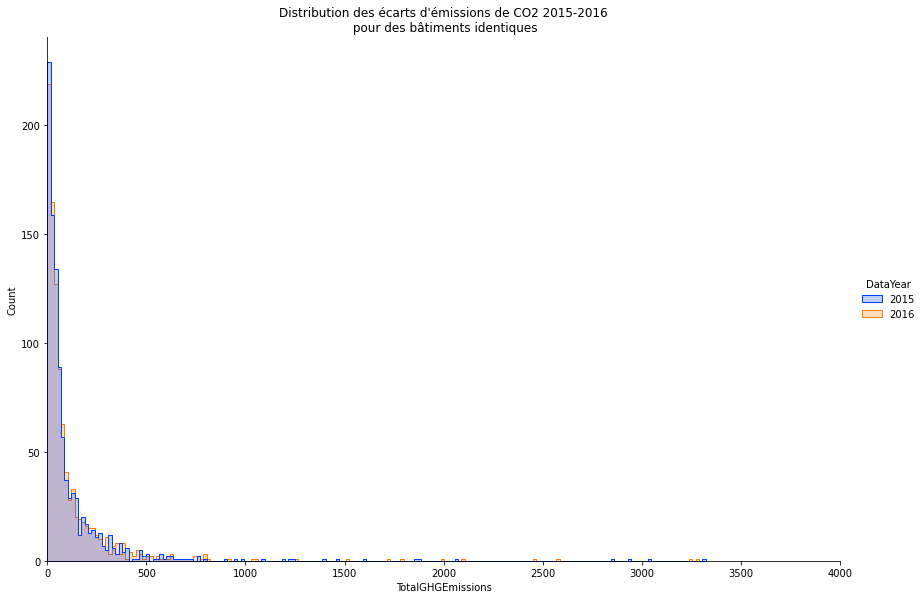

In [56]:
ghg = sns.displot(dbleBat, x='TotalGHGEmissions', hue='DataYear',  
            element="step", palette='bright', height=8, aspect=1.5)
plt.xlim(0,4000)
ghg.set(title="Distribution des écarts d'émissions de CO2 2015-2016\n pour des bâtiments identiques")

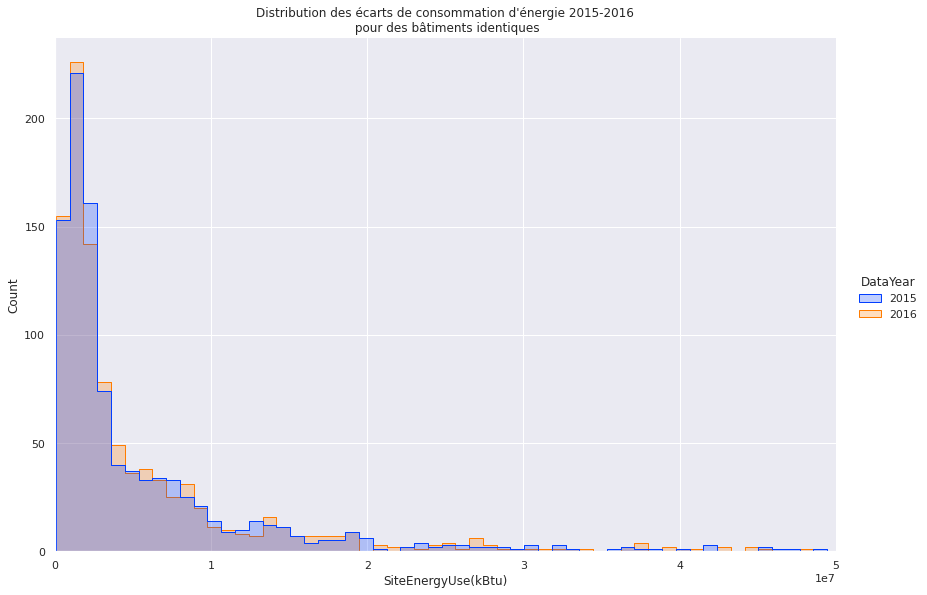

In [63]:
seu=sns.displot(dbleBat, x='SiteEnergyUse(kBtu)', hue='DataYear',  
            element="step", palette='bright', height=8, aspect=1.5)
plt.xlim(0,0.5e8)
seu.set(title="Distribution des écarts de consommation d'énergie 2015-2016\n pour des bâtiments identiques")


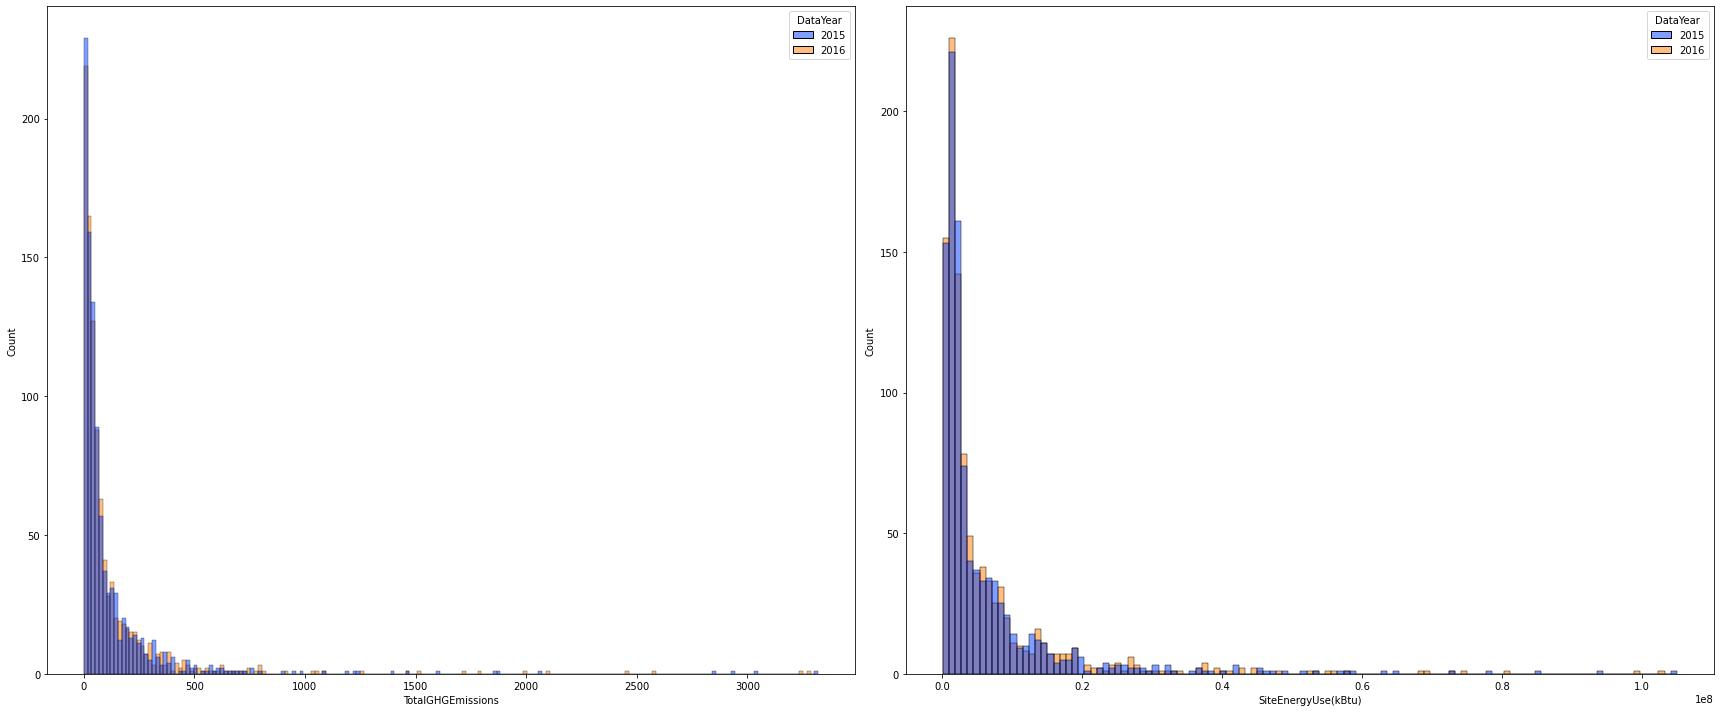

In [58]:
f, axs = plt.subplots(1, 2, figsize=(24, 10))
sns.histplot(data=dbleBat, x="TotalGHGEmissions", hue="DataYear", palette='bright', ax=axs[0])
sns.histplot(data=dbleBat, x="SiteEnergyUse(kBtu)", hue="DataYear", palette='bright', ax=axs[1])
f.tight_layout()

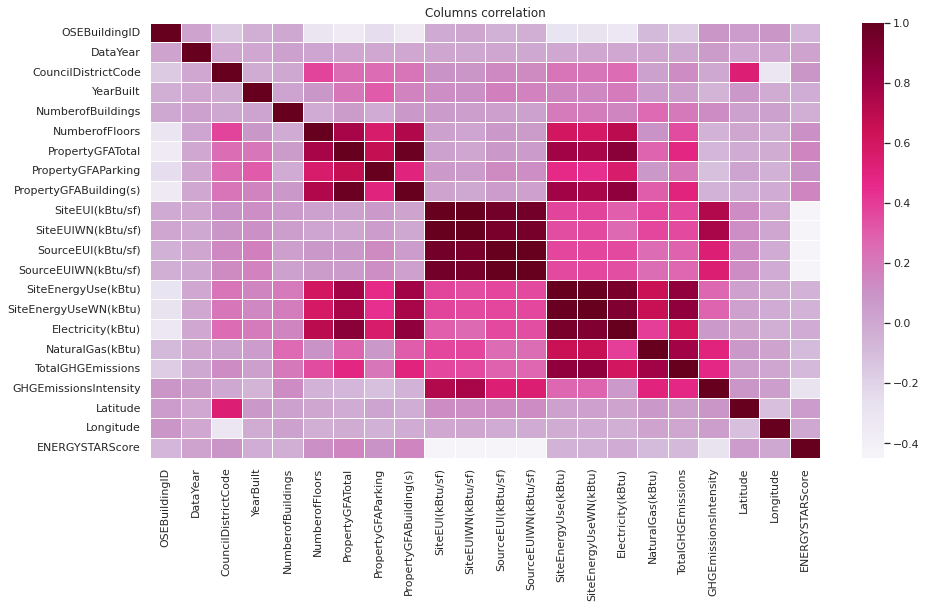

In [62]:
sns.heatmap(dfUsed.corr(), xticklabels=True, yticklabels=True, linewidths=.6, cmap="PuRd")
plt.title("Columns correlation")
sns.set(rc = {'figure.figsize':(15,8)})
#plt.figure(figsize=None)
plt.show()


In [60]:
dfUsed.shape

(2108, 28)

In [61]:
dfUsed.to_csv('/home/thomas/Documents/openclassroom/projet3/cleanData.csv',index=False)